In [8]:
from GA import solve
from TSP import compute_distance_matrix, visualize
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt

In [9]:

file_path = '../data/5_CentralRegion.csv'

In [10]:
locations = pd.read_csv(file_path, header=None).values
locations


array([['province', 'lat', 'lon'],
       ['Thanh Hóa', '19.9781573', '105.4816107'],
       ['Nghệ An', '19.1976001', '105.0606760'],
       ['Hà Tĩnh', '18.3504832', '105.7623047'],
       ['Quảng Bình', '17.5095990', '106.4004452'],
       ['Quảng Trị', '16.7897806', '106.9797431'],
       ['Thừa Thiên Huế', '16.4639321', '107.5863388'],
       ['Quảng Nam', '15.5761698', '108.0527132'],
       ['Quảng Ngãi', '14.9953739', '108.6917290'],
       ['Bình Định', '14.0779378', '108.9898798'],
       ['Phú Yên', '13.1912633', '109.1273678'],
       ['Khánh Hòa', '12.2980751', '108.9950386'],
       ['Ninh Thuận', '11.6965639', '108.8928476'],
       ['Bình Thuận', '11.1041572', '108.1832931'],
       ['Kon Tum', '14.6995372', '107.9323831'],
       ['Gia Lai', '13.8177445', '108.2004015'],
       ['Đắk Lắk', '12.8292274', '108.2999058'],
       ['Đắk Nông', '12.2818851', '107.7302484'],
       ['Lâm Đồng', '11.6614957', '108.1335279'],
       ['Đà Nẵng', '16.0680000', '108.2120000']], dt

In [11]:
locations_numeric = locations[1:, 1:].astype(float)

distance_matrix = compute_distance_matrix(locations_numeric)

In [12]:

best_distance, best_route, fitness_history = solve(
    distance_matrix,
    population_size=100,
    generations=200,
    mutation_rate=0.01,
    mutation_algorithm='inversion',
    crossover_algorithm='order',
    selection_algorithm='tournament'
)


In [13]:

# In kết quả
print("Best route:", best_route)
print("Total distance (km):", best_distance)


Best route: [1, 5, 14, 8, 15, 16, 13, 18, 17, 12, 11, 10, 9, 7, 19, 6, 4, 3, 2, 1]
Total distance (km): 2563.791157815784


### Ảnh hưởng của Population size

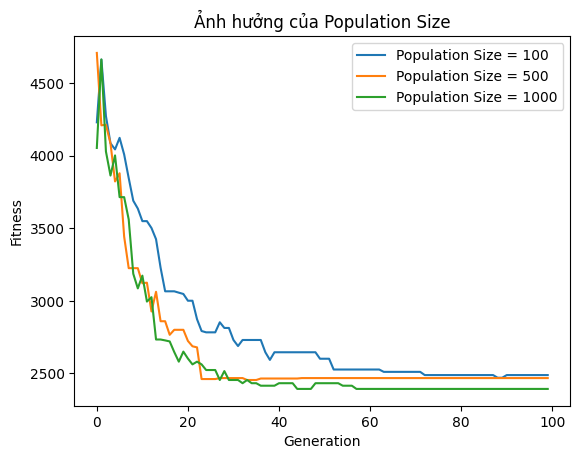

In [14]:
fitness1 = solve(distance_matrix, generations=100, mutation_rate=0.01, population_size=100)[2]
fitness2 = solve(distance_matrix, generations=100, mutation_rate=0.01, population_size=500)[2]
fitness3 = solve(distance_matrix, generations=100, mutation_rate=0.01, population_size=1000)[2]

plt.plot(fitness1, label='Population Size = 100')
plt.plot(fitness2, label='Population Size = 500')
plt.plot(fitness3, label='Population Size = 1000')
plt.xlabel("Generation")
plt.ylabel("Fitness")
plt.title("Ảnh hưởng của Population Size")
plt.legend()
plt.show()

In [15]:
import pandas as pd
pd.DataFrame({
    'gen_1': fitness1,
    'gen_2': fitness2,
    'gen_3': fitness3
}).to_csv('fitness.csv', index=False)

In [16]:
print(fitness1[:5])


[np.float64(4229.742053399226), np.float64(4662.555671050923), np.float64(4273.09296766902), np.float64(4085.48233025316), np.float64(4043.173503745998)]


### Đánh giá kết quả:

## Ảnh hưởng của mutation_rate

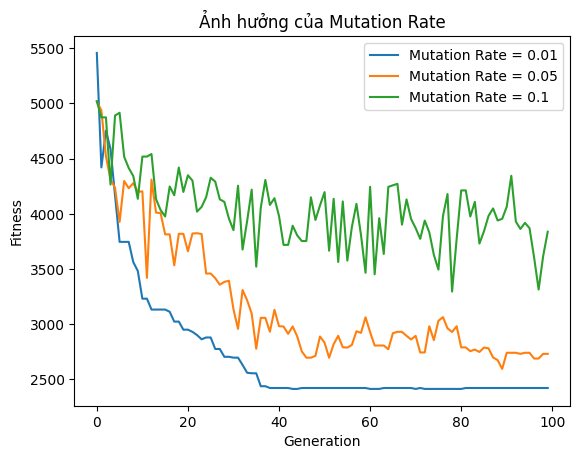

In [17]:
fitness1 = solve(distance_matrix, generations=100, mutation_rate=0.01, population_size=100)[2]
fitness4 = solve(distance_matrix, generations=100, mutation_rate=0.05, population_size=100)[2]
fitness5 = solve(distance_matrix, generations=100, mutation_rate=0.1, population_size=100)[2]

plt.plot(fitness1, label='Mutation Rate = 0.01')
plt.plot(fitness4, label='Mutation Rate = 0.05')
plt.plot(fitness5, label='Mutation Rate = 0.1')
plt.xlabel("Generation")
plt.ylabel("Fitness")
plt.title("Ảnh hưởng của Mutation Rate")
plt.legend()
plt.show()


## Ảnh hưởng của generations

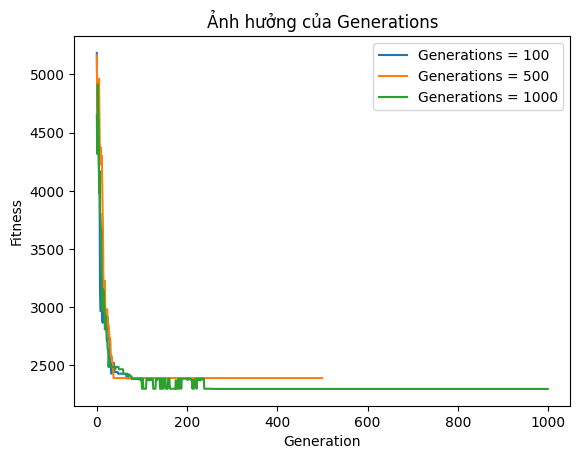

In [18]:
fitness1 = solve(distance_matrix, generations=100, mutation_rate=0.01, population_size=100)[2]
fitness2 = solve(distance_matrix, generations=500, mutation_rate=0.01, population_size=100)[2]
fitness3 = solve(distance_matrix, generations=1000, mutation_rate=0.01, population_size=100)[2]

plt.plot(fitness1, label='Generations = 100')
plt.plot(fitness2, label='Generations = 500')
plt.plot(fitness3, label='Generations = 1000')
plt.xlabel("Generation")
plt.ylabel("Fitness")
plt.title("Ảnh hưởng của Generations")
plt.legend()
plt.show()

### Đánh giá kết quả:

## Tăng đồng thời mutation_rate và population_size

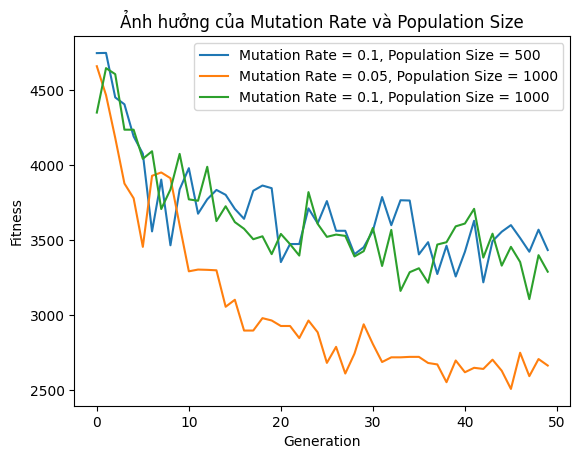

In [19]:
fitness1 = solve(distance_matrix, generations=50, mutation_rate=0.1, population_size=500)[2]
fitness2 = solve(distance_matrix, generations=50, mutation_rate=0.05, population_size=1000)[2]
fitness3 = solve(distance_matrix, generations=50, mutation_rate=0.1, population_size=1000)[2]

plt.plot(fitness1, label='Mutation Rate = 0.1, Population Size = 500')
plt.plot(fitness2, label='Mutation Rate = 0.05, Population Size = 1000')
plt.plot(fitness3, label='Mutation Rate = 0.1, Population Size = 1000')
plt.xlabel("Generation")
plt.ylabel("Fitness")
plt.title("Ảnh hưởng của Mutation Rate và Population Size")
plt.legend()
plt.show()

### Đánh giá kết quả:

## Tăng đồng thời mutation_rate và generations

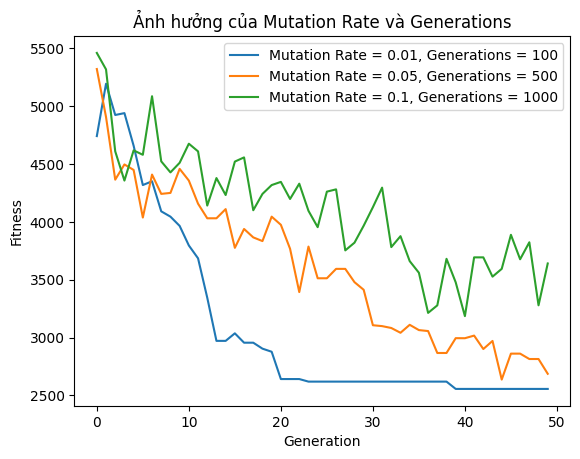

In [ ]:
fitness1 = solve(distance_matrix, generations=100, mutation_rate=0.01, population_size=100)[2]
fitness2 = solve(distance_matrix, generations=100, mutation_rate=0.05, population_size=100)[2]
fitness3 = solve(distance_matrix, generations=50, mutation_rate=0.1, population_size=100)[2]
plt.plot(fitness1, label='Mutation Rate = 0.01, Generations = 100')
plt.plot(fitness2, label='Mutation Rate = 0.05, Generations = 500')
plt.plot(fitness3, label='Mutation Rate = 0.1, Generations = 1000') 
plt.xlabel("Generation")
plt.ylabel("Fitness")
plt.title("Ảnh hưởng của Mutation Rate và Generations")
plt.legend()
plt.show()


### Đánh giá kết quả:

## Tăng đồng thời generations và population_size

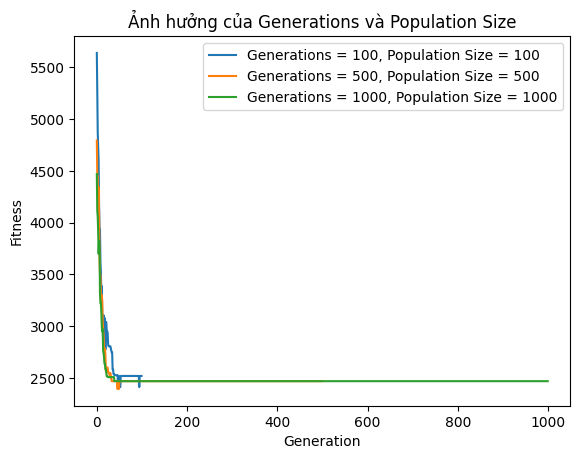

In [21]:
fitness1 = solve(distance_matrix, generations=100, mutation_rate=0.01, population_size=100)[2]
fitness2 = solve(distance_matrix, generations=500, mutation_rate=0.01, population_size=500)[2]
fitness3 = solve(distance_matrix, generations=1000, mutation_rate=0.01, population_size=1000)[2]
plt.plot(fitness1, label='Generations = 100, Population Size = 100')
plt.plot(fitness2, label='Generations = 500, Population Size = 500')
plt.plot(fitness3, label='Generations = 1000, Population Size = 1000')
plt.xlabel("Generation")
plt.ylabel("Fitness")
plt.title("Ảnh hưởng của Generations và Population Size")
plt.legend()
plt.show()


### Đánh giá kết quả:

## KẾT LUẬN